Observed frequency:
A
0.0473333333333
B
0.0346666666667
 [-----------------100%-----------------] 25000 of 25000 complete in 1.9 sec

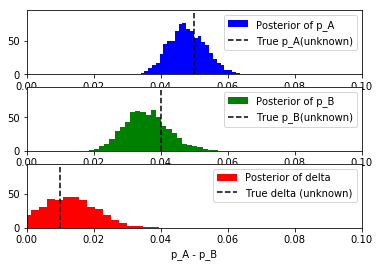

Probability that p_A > p_B:
0.92045


In [16]:
from pymc import Uniform, rbernoulli, Bernoulli, MCMC, deterministic
from matplotlib import pyplot as plt

p_A_true = 0.05
p_B_true = 0.04
N_A = 1500
N_B = 750

occurrences_A = rbernoulli(p_A_true, N_A)
occurrences_B = rbernoulli(p_B_true, N_B)

print ('Observed frequency:')
print ('A')
print (occurrences_A.sum() / float(N_A))
print ('B')
print (occurrences_B.sum() / float(N_B))

p_A = Uniform('p_A', lower=0, upper=1)
p_B = Uniform('p_B', lower=0, upper=1)

@deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

obs_A = Bernoulli('obs_A', p_A, value=occurrences_A, observed=True)
obs_B = Bernoulli('obs_B', p_B, value=occurrences_B, observed=True)

mcmc = MCMC([p_A, p_B, obs_A, obs_B, delta])
mcmc.sample(25000, 5000)

p_A_samples = mcmc.trace('p_A')[:]
p_B_samples = mcmc.trace('p_B')[:]
delta_samples = mcmc.trace('delta')[:]

plt.subplot(3,1,1)
plt.xlim(0, 0.1)
plt.hist(p_A_samples, bins=35, histtype='stepfilled', normed=True,
color='blue', label='Posterior of p_A')
plt.vlines(p_A_true, 0, 90, linestyle='--', label='True p_A(unknown)')
plt.xlabel('Probability of clicking BUY via A')
plt.legend()
plt.subplot(3,1,2)
plt.xlim(0, 0.1)
plt.hist(p_B_samples, bins=35, histtype='stepfilled', normed=True,
color='green', label='Posterior of p_B')
plt.vlines(p_B_true, 0, 90, linestyle='--', label='True p_B(unknown)')
plt.xlabel('Probability of clicking BUY via B')
plt.legend()
plt.subplot(3,1,3)
plt.xlim(0, 0.1)
plt.hist(delta_samples, bins=35, histtype='stepfilled', normed=True,
color='red', label='Posterior of delta')
plt.vlines(p_A_true - p_B_true, 0, 90, linestyle='--', label='True delta (unknown)')
plt.xlabel('p_A - p_B')
plt.legend()
plt.show()
print ('Probability that p_A > p_B:')
print ((delta_samples > 0).mean())
# Probability that p_A > p_B
# 0.8919

In [108]:
from pymc import Uniform, rbernoulli, Bernoulli, MCMC, deterministic
from matplotlib import pyplot as plt

# p_A_true = 0.05
# p_B_true = 0.04
N_A = 1000
N_B = 1000

# occurrences_A = rbernoulli(p_A_true, N_A)
# occurrences_B = rbernoulli(p_B_true, N_B)
occurrences_A = 275
occurrences_B = 825
# print ('Observed frequency:')
# print ('A')
# print (occurrences_A.sum() / float(N_A))
# print ('B')
# print (occurrences_B.sum() / float(N_B))

p_A = Uniform('p_A', lower=0, upper=1)
p_B = Uniform('p_B', lower=0, upper=1)

@deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

obs_A = Bernoulli('obs_A', p_A, value=occurrences_A, observed=True)
obs_B = Bernoulli('obs_B', p_B, value=occurrences_B, observed=True)

mcmc = MCMC([p_A, p_B, obs_A, obs_B, delta])
mcmc.sample(25000, 5000)

p_A_samples = mcmc.trace('p_A')[:]
p_B_samples = mcmc.trace('p_B')[:]
delta_samples = mcmc.trace('delta')[:]

# plt.subplot(3,1,1)
# plt.xlim(0, 0.1)
# plt.hist(p_A_samples, bins=35, histtype='stepfilled', normed=True,
# color='blue', label='Posterior of p_A')
# plt.vlines(p_A_true, 0, 90, linestyle='--', label='True p_A(unknown)')
# plt.xlabel('Probability of clicking BUY via A')
# plt.legend()
# plt.subplot(3,1,2)
# plt.xlim(0, 0.1)
# plt.hist(p_B_samples, bins=35, histtype='stepfilled', normed=True,
# color='green', label='Posterior of p_B')
# plt.vlines(p_B_true, 0, 90, linestyle='--', label='True p_B(unknown)')
# plt.xlabel('Probability of clicking BUY via B')
# plt.legend()
# plt.subplot(3,1,3)
# plt.xlim(0, 0.1)
# plt.hist(delta_samples, bins=35, histtype='stepfilled', normed=True,
# color='red', label='Posterior of delta')
# plt.vlines(p_A_true - p_B_true, 0, 90, linestyle='--', label='True delta (unknown)')
# plt.xlabel('p_A - p_B')
# plt.legend()
# plt.show()
print ('Probability that p_A > p_B:')
print ((delta_samples > 0).mean())
# Probability that p_A > p_B
# 0.8919

 [-----------------100%-----------------] 25000 of 25000 complete in 1.5 secProbability that p_A > p_B:
0.4975


Click-BUY:
56
Observed frequency:
0.0373333333333
 [-----------------100%-----------------] 20000 of 20000 complete in 0.9 sec[ 0.04282117  0.04282117  0.04282117 ...,  0.04436524  0.04625138
  0.05397854]


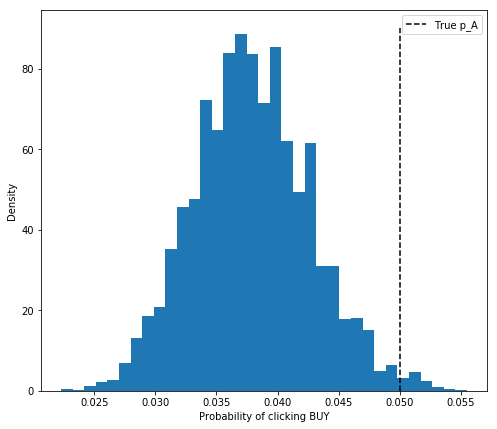

There is 90% probability that p_A is between 0.0301077676275 and 0.0461768543962


In [97]:
from pymc import Uniform, rbernoulli, Bernoulli, MCMC
from matplotlib import pyplot as plt
import numpy as np

# true value of p_A (unknown)
p_A_true = 0.05
# number of users visiting page A
N = 1500
occurrences = rbernoulli(p_A_true, N)

print ('Click-BUY:')
print (occurrences.sum())
print ('Observed frequency:')
print (occurrences.sum() / float(N))
p_A = Uniform('p_A', lower=0, upper=1)
obs = Bernoulli('obs', p_A, value=occurrences, observed=True)
# defining a Monte Carlo Markov Chain model
mcmc = MCMC([p_A, obs])
# setting the size of the simulations to 20k particles
mcmc.sample(20000, 1000)
# the resulting posterior distribution is stored in the trace variable
print (mcmc.trace('p_A')[:])
plt.figure(figsize=(8, 7))
plt.hist(mcmc.trace('p_A')[:], bins=35, histtype='stepfilled',
normed=True)
plt.xlabel('Probability of clicking BUY')
plt.ylabel('Density')
plt.vlines(p_A_true, 0, 90, linestyle='--', label='True p_A')
plt.legend()
plt.show()

p_A_samples = mcmc.trace('p_A')[:]
lower_bound = np.percentile(p_A_samples, 5)
upper_bound = np.percentile(p_A_samples, 95)
print ('There is 90%% probability that p_A is between %s and %s' %(lower_bound, upper_bound))
# There is 90% probability that p_A is between 0.0373019596856 and 0.0548052806892

In [95]:
import pymc as pm

A_true = 0.9
B_true = 0.04

N_A = 1500
N_B = 750

observations_A = pm.rbernoulli(A_true, N_A)
observations_B = pm.rbernoulli(B_true, N_B)
print(observations_A)
print(observations_A.sum())
print(observations_A.sum()/float(N_A))
print(observations_A.mean())
print(observations_B.mean())

[ True  True  True ...,  True  True  True]
1327
0.884666666667
0.884666666667
0.0306666666667


In [127]:
import numpy as np
import pymc
import scipy as sp
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
values_A = np.hstack(([0]*(1055-28),[1]*28))
values_B = np.hstack(([0]*(1057-45),[1]*45))
p_A = pymc.Uniform('p_A', 0, 1)
p_B = pymc.Uniform('p_B', 0, 1)

@pymc.deterministic
def delta(p_A = p_A, p_B = p_B):
    return p_B - p_A

obs_A = pymc.Bernoulli('obs_A', p_A, value = values_A , observed = True)
obs_B = pymc.Bernoulli('obs_B', p_B, value = values_B , observed = True)
model = pymc.Model([p_A, p_B, delta, values_A, values_B])
mcmc = pymc.MCMC(model)

mcmc.sample(1000000, 500000)
siteA_distribution = mcmc.trace("p_A")[:]
siteB_distribution = mcmc.trace("p_B")[:]
delta_distribution = mcmc.trace('delta')[:]

# sns.kdeplot(delta_distribution, shade = True)
# plt.axvline(0.00, color = 'black')
# plt.savefig("results/2sites_diff.png", format = "PNG")

print ("Probability that website A gets MORE sign-ups than website B: %0.3f" % (delta_distribution < 0).mean())
print ("Probability that website A gets LESS sign-ups than website B: %0.3f" % (delta_distribution > 0).mean())

Populating the interactive namespace from numpy and matplotlib
 [-----------------100%-----------------] 1000000 of 1000000 complete in 70.7 secProbability that website A gets MORE sign-ups than website B: 0.022
Probability that website A gets LESS sign-ups than website B: 0.978


 [-----------------100%-----------------] 1000000 of 1000000 complete in 105.4 sec

NameError: name 'diff_CA' is not defined

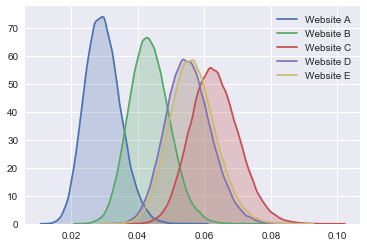

In [119]:
@pymc.stochastic(dtype=np.float64)
def beta_priors(value=[1.0, 1.0]):
    a, b = value
    if a <= 0 or b <= 0:
        return -np.inf
    else:
        return np.log(np.power((a + b), -2.5))

a = beta_priors[0]
b = beta_priors[1]

#The hidden, true rate for each website.
true_rates = pymc.Beta('true_rates', a, b, size=5)

# This is what we observed
trials = np.array([1055, 1057, 1065, 1039, 1046])
successes = np.array([28, 45, 69, 58, 60])
observed_values = pymc.Binomial('observed_values', trials, true_rates, observed=True, value=successes)

model = pymc.Model([a, b, true_rates, observed_values])
mcmc = pymc.MCMC(model)

# Generate 1M samples, and throw out the first 500k
mcmc.sample(1000000, 500000)

for i in range(5):
    sns.kdeplot(mcmc.trace('true_rates')[:][:,i], shade = True, label = "Website %s" % chr(65+i))
#     plt.savefig("results/five_hier.png", format = "PNG")

diff_BA = mcmc.trace('true_rates')[:][:,1] - mcmc.trace('true_rates')[:][:,0]
sns.kdeplot(diff_CA, shade = True, label = "Difference site B - site A")
plt.axvline(0.0, color = 'black')
# plt.savefig("results/hierarchial_BA.png", format = "PNG")



In [120]:
print ("Probability that website A gets MORE sign-ups than website B: %0.3f" % (diff_BA < 0).mean())
print ("Probability that website A gets LESS sign-ups than website B: %0.3f" % (diff_BA > 0).mean())

Probability that website A gets MORE sign-ups than website B: 0.034
Probability that website A gets LESS sign-ups than website B: 0.966


FileNotFoundError: [Errno 2] No such file or directory: 'results/hierarchial_CA.png'

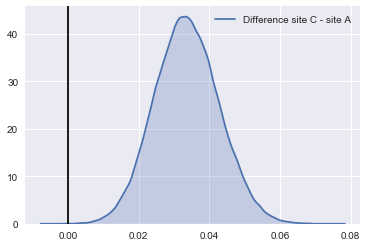

In [121]:
diff_CA = mcmc.trace('true_rates')[:][:,2] - mcmc.trace('true_rates')[:][:,0]
sns.kdeplot(diff_CA, shade = True, label = "Difference site C - site A")
plt.axvline(0.0, color = 'black')
plt.savefig("results/hierarchial_CA.png", format = "PNG")

In [126]:
@pymc.stochastic(dtype=np.float64)
def beta_priors(value=[1.0, 1.0]):
    a, b = value
    if a <= 0 or b <= 0:
        return -np.inf
    else:
        return np.log(np.power((a + b), -2.5))

# a = beta_priors[0]
# b = beta_priors[1]
print(a)
print(b)

beta_priors[0]
beta_priors[1]


current samples: ['0.0743', '0.3537', '0.7369']


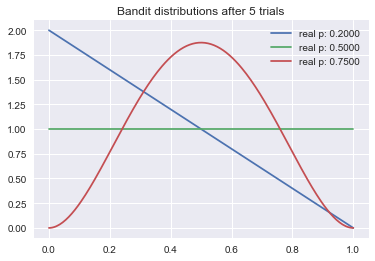

current samples: ['0.6280', '0.0739', '0.7621']


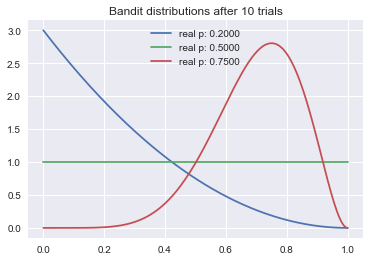

current samples: ['0.0468', '0.4602', '0.8268']


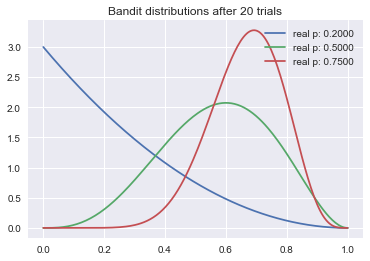

current samples: ['0.0917', '0.4975', '0.8287']


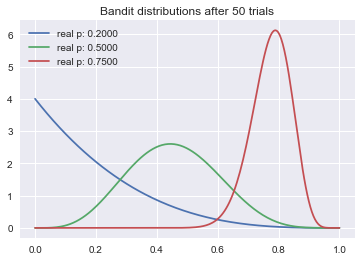

current samples: ['0.2922', '0.6955', '0.6949']


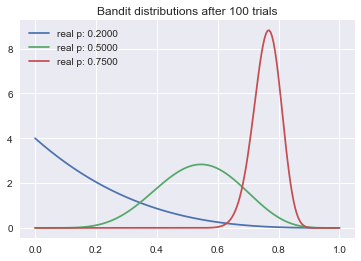

current samples: ['0.0336', '0.4366', '0.7829']


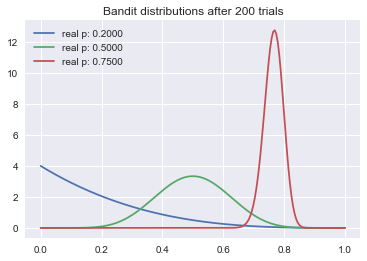

current samples: ['0.0167', '0.4298', '0.7605']


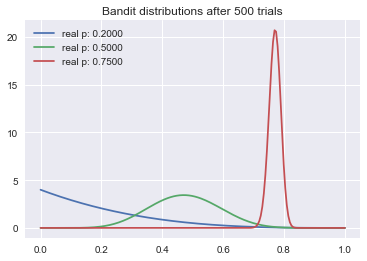

current samples: ['0.2049', '0.3883', '0.7586']


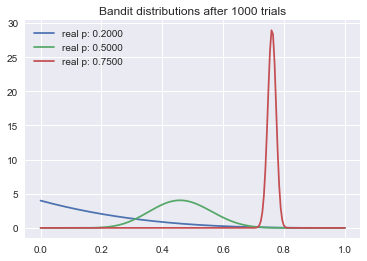

current samples: ['0.1202', '0.3228', '0.7409']


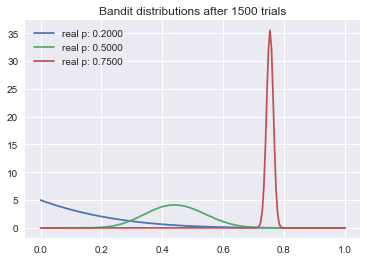

current samples: ['0.2951', '0.5091', '0.7602']


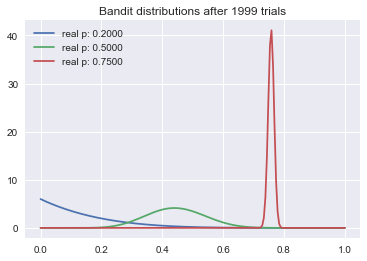

In [128]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta


NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]


class Bandit(object):
  def __init__(self, p):
    self.p = p
    self.a = 1
    self.b = 1

  def pull(self):
    return np.random.random() < self.p

  def sample(self):
    return np.random.beta(self.a, self.b)

  def update(self, x):
    self.a += x
    self.b += 1 - x


def plot(bandits, trial):
  x = np.linspace(0, 1, 200)
  for b in bandits:
    y = beta.pdf(x, b.a, b.b)
    plt.plot(x, y, label="real p: %.4f" % b.p)
  plt.title("Bandit distributions after %s trials" % trial)
  plt.legend()
  plt.show()


def experiment():
  bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]

  sample_points = [5,10,20,50,100,200,500,1000,1500,1999]
  for i in range(NUM_TRIALS):

    # take a sample from each bandit
    bestb = None
    maxsample = -1
    allsamples = [] # let's collect these just to print for debugging
    for b in bandits:
      sample = b.sample()
      allsamples.append("%.4f" % sample)
      if sample > maxsample:
        maxsample = sample
        bestb = b
    if i in sample_points:
      print("current samples: %s" % allsamples)
      plot(bandits, i)

    # pull the arm for the bandit with the largest sample
    x = bestb.pull()

    # update the distribution for the bandit whose arm we just pulled
    bestb.update(x)


if __name__ == "__main__":
  experiment()


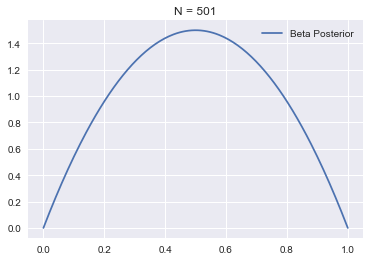

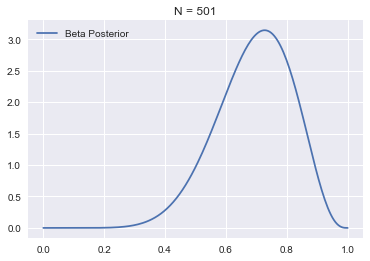

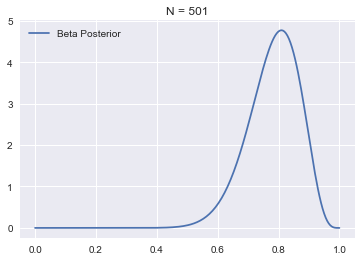

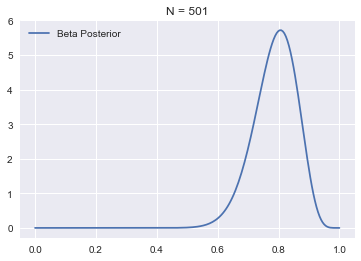

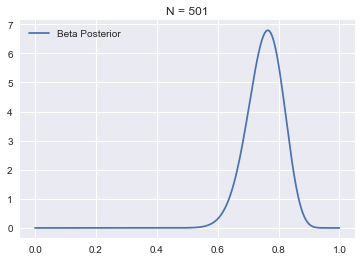

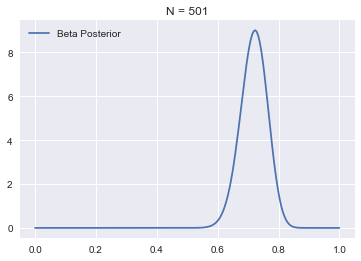

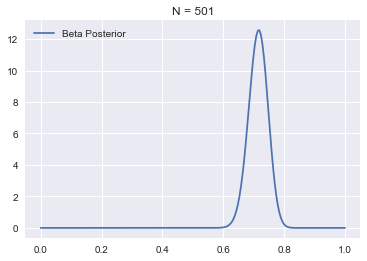

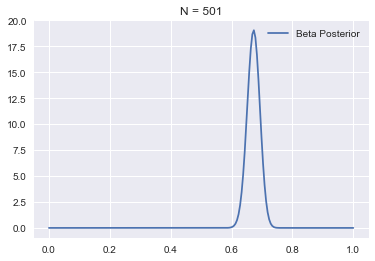

In [148]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta, norm

T = 501 # number of coin tosses
true_ctr = 0.2
a, b = 1, 1 # beta priors
plot_indices = (1, 10, 20, 30, 50, 100, 200, 500)
array = np.random.choice([0, 1], size=(501,), p=[1./3, 2./3])
data = np.empty(T)
for i in range(T):
  x = array[i]
#   x = 1 if np.random.random() < true_ctr else 0
  data[i] = x

  # update a and b
  a += x
  b += 1 - x

  if i in plot_indices:
    # maximum likelihood estimate of ctr
#     p = data[:i].mean()
#     n = i + 1 # number of samples collected so far
#     std = np.sqrt(p*(1-p)/n)
    
    # gaussian
    x = np.linspace(0, 1, 200)
#     g = norm.pdf(x, loc=p, scale=std)
#     plt.plot(x, g, label='Gaussian Approximation')

    # beta
    posterior = beta.pdf(x, a=a, b=b)
    plt.plot(x, posterior, label='Beta Posterior')
    plt.legend()
    plt.title("N = %s" % n)
    plt.show()


In [145]:
np.random.choice([0, 1], size=(10,), p=[2./3, 1./3])


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1])

0.50416
We are 49.584000000000003% sure that the experiment in better than the control
0.98315
We are 1.6850000000000023% sure that the experiment in better than the control
0.9694
We are 3.0600000000000023% sure that the experiment in better than the control
0.97893
We are 2.1069999999999993% sure that the experiment in better than the control
0.99232
We are 0.76800000000000068% sure that the experiment in better than the control
0.99481
We are 0.51900000000000546% sure that the experiment in better than the control
1.0
We are 0.0% sure that the experiment in better than the control
1.0
We are 0.0% sure that the experiment in better than the control


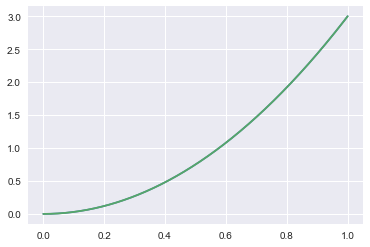

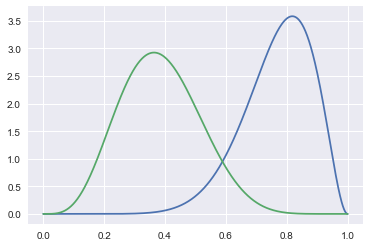

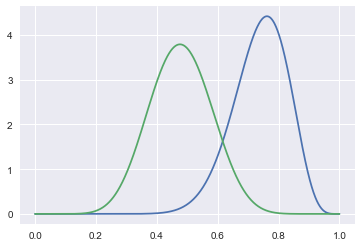

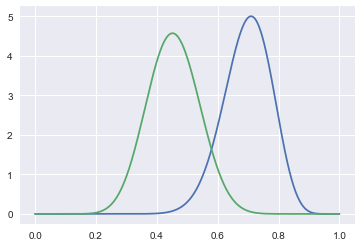

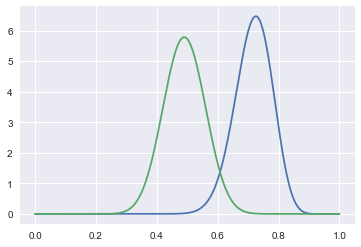

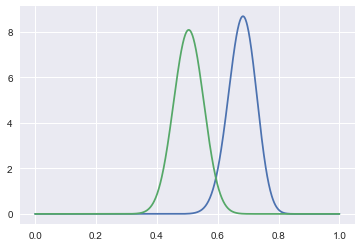

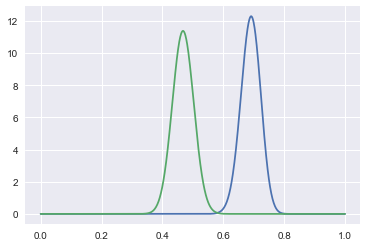

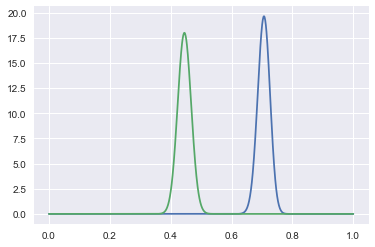

In [157]:
# From the course: Bayesin Machine Learning in Python: A/B Testing
# https://deeplearningcourses.com/c/bayesian-machine-learning-in-python-ab-testing
# https://www.udemy.com/bayesian-machine-learning-in-python-ab-testing
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
import pandas as pd
import seaborn as sns

T = 501 # number of coin tosses
true_ctr = 0.2
a1, b1, a2, b2 = 1, 1, 1, 1 # beta priors
plot_indices = (1, 10, 20, 30, 50, 100, 200, 500)
array1 = np.random.choice([0, 1], size=(501,), p=[1./3, 2./3])
array2 = np.random.choice([0, 1], size=(501,), p=[1./2, 1./2])
# data = np.empty(T)
for i in range(T):
  x1 = array1[i]
  x2 = array2[i]  
#   x = 1 if np.random.random() < true_ctr else 0
#   data[i] = x

  # update a and b
  a1 += x1
  b1 += 1 - x1
  a2 += x2
  b2 += 1 - x2
  if i in plot_indices:
    # maximum likelihood estimate of ctr
#     p = data[:i].mean()
#     n = i + 1 # number of samples collected so far
#     std = np.sqrt(p*(1-p)/n)
    
    # gaussian
    fig, ax = plt.subplots(1,1)
    x = np.linspace(0., 1, 1000)
#     g = norm.pdf(x, loc=p, scale=std)
#     plt.plot(x, g, label='Gaussian Approximation')

    # beta
    
    dist1 = beta(a1,b1)
    dist2 = beta(a2,b2)
    ax.plot(x, dist1.pdf(x))
    ax.plot(x, dist2.pdf(x))
    
    sample_size = 100000

    c_samples = pd.Series([dist1.rvs() for _ in range(sample_size)])
    e_samples = pd.Series([dist2.rvs() for _ in range(sample_size)])

    p_value_equivalent = 1.0 - sum(e_samples > c_samples)/sample_size
# should be less than 0.05 for signifance
    print (p_value_equivalent)

    print ('We are ' + repr(100 - p_value_equivalent*100) + '% sure that the experiment in better than the control')
#     posterior = beta.pdf(x1, a=a2, b=b2)
#     plt.plot(x1, posterior, label='Beta Posterior')
#     plt.legend()
#     plt.title("N = %s" % n)
#     plt.show()
